In [7]:
import os

import matplotlib.patches as patches
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
from matplotlib import gridspec
import matplotlib.lines as mlines

COMMON_MODEL = ['CMCC-ESM2', 'CESM2-WACCM','NorESM2-MM', 'TaiESM1', 'EC-Earth3-Veg','CMCC-CM2-SR5', 'BCC-CSM2-MR']
OBSERVATION_INPUT_PATH = "E:/Drought_And_SOC/000_observasion_data_ERA5"
MODEL_INPUT_PATH = "F:/007_CorrectAndRepair_data_CMIP6"
MMEM_INPUT_PATH = "F:/007-1_MEM_data_CMIP6/raw"
MMWM_INPUT_PATH = "F:/007-2_MMWM_data_CMIP6/raw"
OUTPUT_PATH = "E:/Drought_And_SOC/res/figs/Supplementary"

# 定义统一的样式字典
MODEL_STYLES = {
    'MMEM': {'color': 'red', 'linewidth': 2, 'linestyle': '-', 'label': 'MMEM', 'zorder': 15},
    'MMWM': {'color': 'blue', 'linewidth': 2, 'linestyle': ':', 'label': 'MMWM', 'zorder': 20},
    'ERA5': {'color': 'black', 'linewidth': 3, 'linestyle': '--', 'label': 'ERA5', 'zorder': 10},
    'OTHER': {'color': 'gray', 'alpha': 0.7, 'linestyle': '-.', 'linewidth': 2, 'label': 'Other Models', 'zorder': 5}
}

In [8]:
def plot_supplementary_fig1a(fig, ax):
    pr_MMEM = xr.open_dataset(f"{MMEM_INPUT_PATH}/pr_MMEM.nc")['ssp126_pr'].sel(time=slice('1985-01-01', '2014-12-31')).mean(dim=['lat', 'lon'])
    pr_obs = xr.open_dataset(f"{OBSERVATION_INPUT_PATH}/pr_proj.nc")['pr'].sel(time=slice('1985-01-01', '2014-12-31')).mean(dim=['lat', 'lon'])

    pr_model = {}
    for model in COMMON_MODEL:
        pr_tmp = xr.open_dataset(f"{MODEL_INPUT_PATH}/{model}/{model}_SeasonAndLand_corrected_pr.nc")['ssp126_pr'].sel(time=slice('1985-01-01', '2014-12-31')).mean(dim=['lat', 'lon'])
        pr_model[model] = pr_tmp

    # 绘制多模型集合和观测数据
    ax.plot(pr_MMEM.time, pr_MMEM.values, **MODEL_STYLES['MMEM'])
    ax.plot(pr_obs.time, pr_obs.values, **MODEL_STYLES['ERA5'])

    for model, data in pr_model.items():
        ax.plot(data.time, data.values, **MODEL_STYLES['OTHER'])

    ax.set_ylabel('Precipitation (mm month$^{-1}$)', fontsize=20)

    ax.tick_params(axis='x', labelsize=16)  # 设置 x 轴刻度字体大小
    ax.tick_params(axis='y', labelsize=16)  # 设置 y 轴刻度字体大小

    ax.text(0.01, 0.97, 'a',
            fontweight='bold',
            transform=ax.transAxes,
            fontsize=22,
            va='top', ha='left',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))


In [9]:
def plot_supplementary_fig1b(fig, ax):
    ts_MMEM = xr.open_dataset(f"{MMEM_INPUT_PATH}/ts_MMEM.nc")['ssp126_ts'].sel(time=slice('1985-01-01', '2014-12-31')).mean(dim=['lat', 'lon'])
    ts_obs = xr.open_dataset(f"{OBSERVATION_INPUT_PATH}/ts_proj.nc")['ts'].sel(time=slice('1985-01-01', '2014-12-31')).mean(dim=['lat', 'lon']) - 273.15

    ts_model = {}
    for model in COMMON_MODEL:
        ts_tmp = xr.open_dataset(f"{MODEL_INPUT_PATH}/{model}/{model}_SeasonAndLand_corrected_ts.nc")['ssp126_ts'].sel(time=slice('1985-01-01', '2014-12-31')).mean(dim=['lat', 'lon'])
        ts_model[model] = ts_tmp

    # 绘制多模型集合和观测数据
    ax.plot(ts_MMEM.time, ts_MMEM.values, **MODEL_STYLES['MMEM'])
    ax.plot(ts_obs.time, ts_obs.values, **MODEL_STYLES['ERA5'])

    for model, data in ts_model.items():
        ax.plot(data.time, data.values, **MODEL_STYLES['OTHER'])

    ax.set_ylabel('Surface Temperature ($^{\circ}$C)', fontsize=20)
    ax.tick_params(axis='x', labelsize=16)  # 设置 x 轴刻度字体大小
    ax.tick_params(axis='y', labelsize=16)  # 设置 y 轴刻度字体大小

    ax.text(0.01, 0.97, 'b',
            fontweight='bold',
            transform=ax.transAxes,
            fontsize=22,
            va='top', ha='left',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

In [10]:
def plot_supplementary_fig1c(fig, ax):
    evspsbl_MMEM = xr.open_dataset(f"{MMEM_INPUT_PATH}/evspsbl_MMEM.nc")['ssp126_evspsbl'].sel(time=slice('1985-01-01', '2014-12-31')).mean(dim=['lat', 'lon'])
    evspsbl_obs = xr.open_dataset(f"{OBSERVATION_INPUT_PATH}/evspsbl_proj.nc")['evspsbl'].sel(time=slice('1985-01-01', '2014-12-31')).mean(dim=['lat', 'lon'])

    evspsbl_model = {}
    for model in COMMON_MODEL:
        evspsbl_tmp = xr.open_dataset(f"{MODEL_INPUT_PATH}/{model}/{model}_SeasonAndLand_corrected_evspsbl.nc")['ssp126_evspsbl'].sel(time=slice('1985-01-01', '2014-12-31')).mean(dim=['lat', 'lon'])
        evspsbl_model[model] = evspsbl_tmp

    # 绘制多模型集合和观测数据
    ax.plot(evspsbl_MMEM.time, evspsbl_MMEM.values, **MODEL_STYLES['MMEM'])
    ax.plot(evspsbl_obs.time, evspsbl_obs.values, **MODEL_STYLES['ERA5'])

    for model, data in evspsbl_model.items():
        ax.plot(data.time, data.values, **MODEL_STYLES['OTHER'])

    ax.set_xlabel('Year', fontsize=20)
    ax.set_ylabel('Evapotranspiration (mm month$^{-1}$)', fontsize=20)
    ax.tick_params(axis='x', labelsize=16)  # 设置 x 轴刻度字体大小
    ax.tick_params(axis='y', labelsize=16)  # 设置 y 轴刻度字体大小

    ax.text(0.01, 0.97, 'c',
            fontweight='bold',
            transform=ax.transAxes,
            fontsize=22,
            va='top', ha='left',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

In [11]:
def plot_supplementary_fig1d(fig, ax):
    mrso_MMEM = xr.open_dataset(f"{MMEM_INPUT_PATH}/mrso_MMEM.nc")['ssp126_mrso'].sel(time=slice('1985-01-01', '2014-12-31')).mean(dim=['lat', 'lon'])
    mrso_obs = xr.open_dataset(f"{OBSERVATION_INPUT_PATH}/mrso_proj.nc")['mrso'].sel(time=slice('1985-01-01', '2014-12-31')).mean(dim=['lat', 'lon'])

    mrso_model = {}
    for model in COMMON_MODEL:
        mrso_tmp = xr.open_dataset(f"{MODEL_INPUT_PATH}/{model}/{model}_SeasonAndLand_corrected_mrso.nc")['ssp126_mrso'].sel(time=slice('1985-01-01', '2014-12-31')).mean(dim=['lat', 'lon'])
        mrso_model[model] = mrso_tmp

    # 绘制多模型集合和观测数据
    ax.plot(mrso_MMEM.time, mrso_MMEM.values, **MODEL_STYLES['MMEM'])
    ax.plot(mrso_obs.time, mrso_obs.values, **MODEL_STYLES['ERA5'])

    for model, data in mrso_model.items():
        ax.plot(data.time, data.values, **MODEL_STYLES['OTHER'])

    ax.set_xlabel('Year', fontsize=20)
    ax.set_ylabel('Soil Moisture (mm month$^{-1}$)', fontsize=20)
    ax.tick_params(axis='x', labelsize=16)  # 设置 x 轴刻度字体大小
    ax.tick_params(axis='y', labelsize=16)  # 设置 y 轴刻度字体大小

    ax.text(0.01, 0.97, 'd',
            fontweight='bold',
            transform=ax.transAxes,
            fontsize=22,
            va='top', ha='left',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

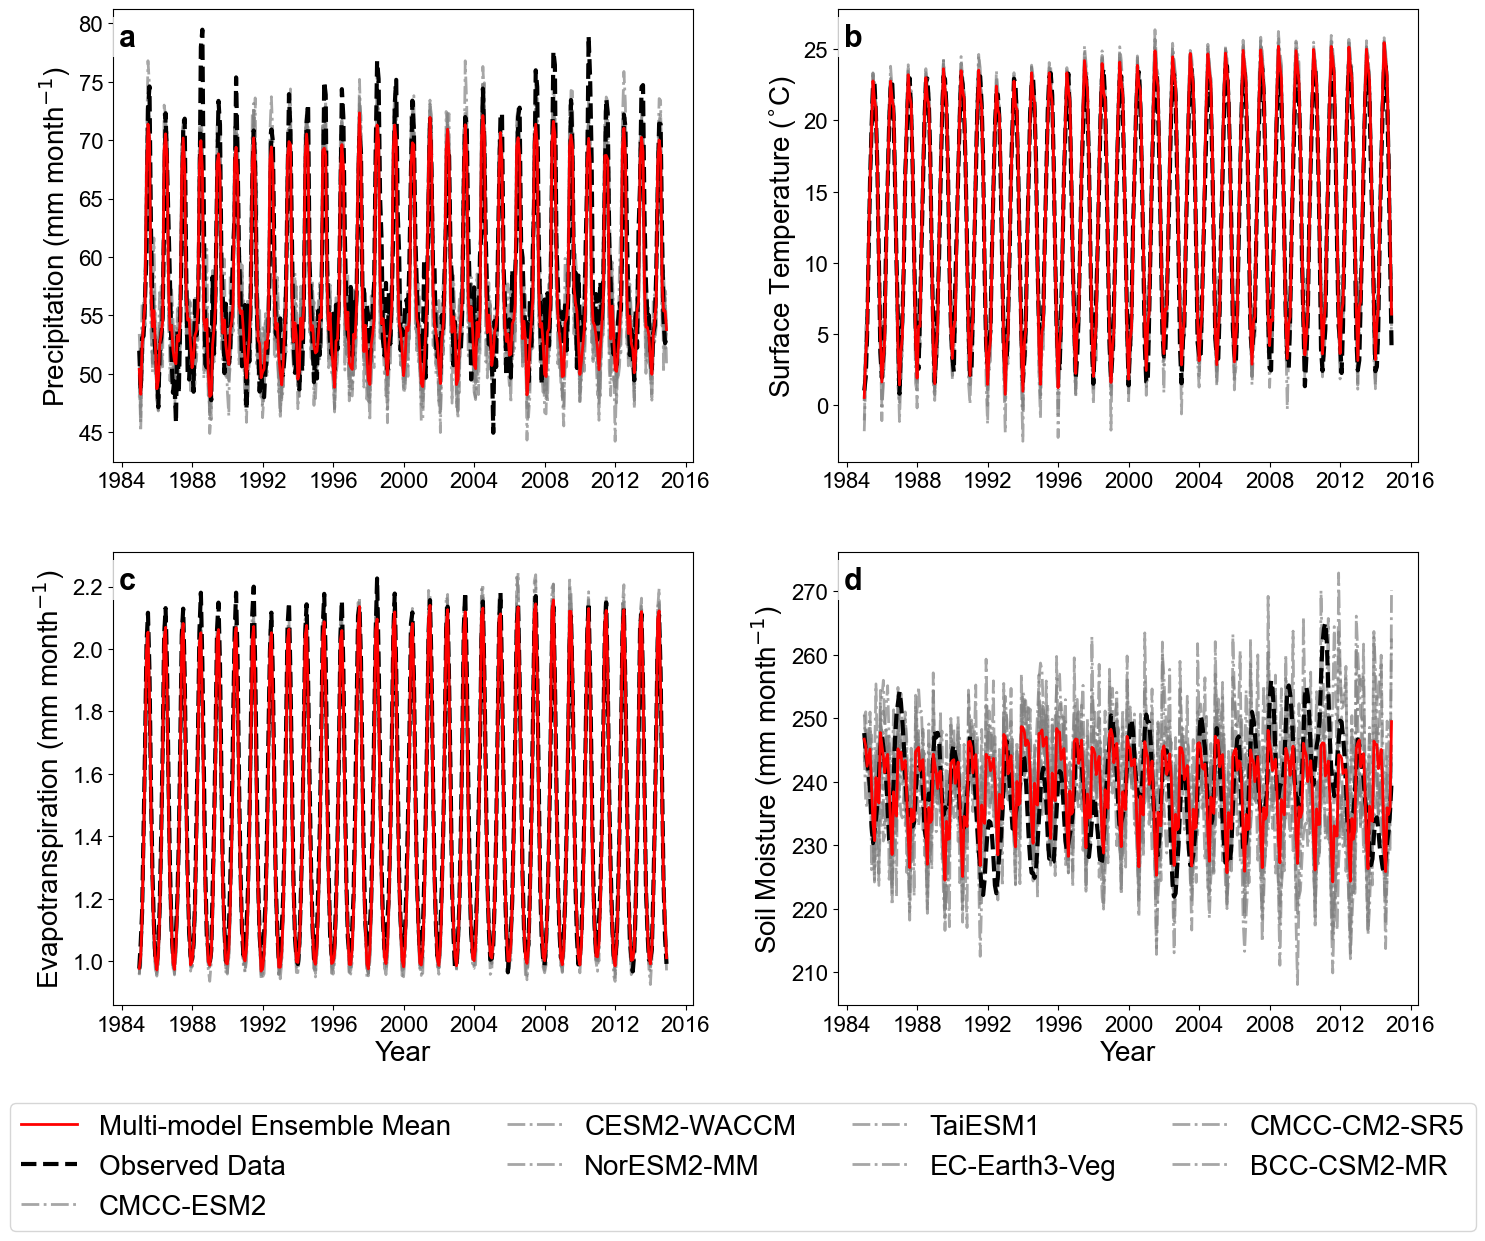

In [12]:
def create_supplementary_fig1():
    plt.rcParams.update({
        'font.family': 'serif',           # 主字体类型（serif衬线 / sans-serif无衬线）
        'font.serif': ['Arial'], # 衬线字体首选
        'font.sans-serif': ['Times New Roman'],      # 无衬线字体备选
    })
    # 创建图形和子图布局
    fig = plt.figure(figsize=(15, 12))

    # 创建m×n的子图布局（根据实际需求调整）
    gs = gridspec.GridSpec(2, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0])
    mesh1 = plot_supplementary_fig1a(fig, ax1)

    ax2 = fig.add_subplot(gs[1])
    mesh2 = plot_supplementary_fig1b(fig, ax2)

    ax3 = fig.add_subplot(gs[2])
    mesh3 = plot_supplementary_fig1c(fig, ax3)

    ax4 = fig.add_subplot(gs[3])
    mesh4 = plot_supplementary_fig1d(fig, ax4)

    # 创建代理艺术家（用于图例）
    mmem_line = mlines.Line2D([], [], **MODEL_STYLES['MMEM'])
    era5_line = mlines.Line2D([], [], **MODEL_STYLES['ERA5'])
    other_line = mlines.Line2D([], [], **MODEL_STYLES['OTHER'])

    # 添加公共图例
    fig.legend(handles=[mmem_line, era5_line, other_line, other_line, other_line, other_line, other_line, other_line, other_line],
               labels=['Multi-model Ensemble Mean', 'Observed Data', COMMON_MODEL[0], COMMON_MODEL[1], COMMON_MODEL[2], COMMON_MODEL[3], COMMON_MODEL[4], COMMON_MODEL[5], COMMON_MODEL[6]],
               loc='upper center',
               bbox_to_anchor=(0.5, 0.05),  # 将图例放在底部
               ncol=4,
               fontsize=20,
               frameon=True)

    # 调整子图间距
    plt.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.12,
                        wspace=0.25, hspace=0.2)
    plt.show()


if __name__ == '__main__':
    create_supplementary_fig1()